In [1]:
import pandas as pd
import numpy as np

## Question 1
### Importing Data
- We import data

In [2]:
from datasets import load_dataset
train_dataset = load_dataset("mnist",split="train")
train_dataset = train_dataset.shuffle(seed=42)

c:\Users\Arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- We filter the data by labels(0-9) and take 100 samples from each 

In [3]:
train_dataset_zero = train_dataset.filter(lambda example: example['label'] == 0)
zero_train_data_image = train_dataset_zero['image'][:100]
zero_train_data_label = train_dataset_zero['label'][:100]

train_dataset_one = train_dataset.filter(lambda example: example['label'] == 1)
one_train_data_image = train_dataset_one['image'][:100]
one_train_data_label = train_dataset_one['label'][:100]

train_dataset_two = train_dataset.filter(lambda example: example['label'] == 2)
two_train_data_image = train_dataset_two['image'][:100]
two_train_data_label = train_dataset_two['label'][:100]

train_dataset_three = train_dataset.filter(lambda example: example['label'] == 3)
three_train_data_image = train_dataset_three['image'][:100]
three_train_data_label = train_dataset_three['label'][:100]

train_dataset_four = train_dataset.filter(lambda example: example['label'] == 4)
four_train_data_image = train_dataset_four['image'][:100]
four_train_data_label = train_dataset_four['label'][:100]

train_dataset_five = train_dataset.filter(lambda example: example['label'] == 5)
five_train_data_image = train_dataset_five['image'][:100]
five_train_data_label = train_dataset_five['label'][:100]

train_dataset_six = train_dataset.filter(lambda example: example['label'] == 6)
six_train_data_image = train_dataset_six['image'][:100]
six_train_data_label = train_dataset_six['label'][:100]

train_dataset_seven = train_dataset.filter(lambda example: example['label'] == 7)
seven_train_data_image = train_dataset_seven['image'][:100]
seven_train_data_label = train_dataset_seven['label'][:100]

train_dataset_eight = train_dataset.filter(lambda example: example['label'] == 8)
eight_train_data_image = train_dataset_eight['image'][:100]
eight_train_data_label = train_dataset_eight['label'][:100]

train_dataset_nine = train_dataset.filter(lambda example: example['label'] == 9)
nine_train_data_image = train_dataset_nine['image'][:100]
nine_train_data_label = train_dataset_nine['label'][:100]

- We preprocess the data to convert image(PNG) data to an array representation

In [4]:
zero_train_data_image = [np.array(image) for image in zero_train_data_image]
one_train_data_image = [np.array(image) for image in one_train_data_image]
two_train_data_image = [np.array(image) for image in two_train_data_image]
three_train_data_image = [np.array(image) for image in three_train_data_image]
four_train_data_image = [np.array(image) for image in four_train_data_image]
five_train_data_image = [np.array(image) for image in five_train_data_image]
six_train_data_image = [np.array(image) for image in six_train_data_image]
seven_train_data_image = [np.array(image) for image in seven_train_data_image]
eight_train_data_image = [np.array(image) for image in eight_train_data_image]
nine_train_data_image = [np.array(image) for image in nine_train_data_image]

zero_train_data_image = [image.flatten() for image in zero_train_data_image]
one_train_data_image = [image.flatten() for image in one_train_data_image]
two_train_data_image = [image.flatten() for image in two_train_data_image]
three_train_data_image = [image.flatten() for image in three_train_data_image]
four_train_data_image = [image.flatten() for image in four_train_data_image]
five_train_data_image = [image.flatten() for image in five_train_data_image]
six_train_data_image = [image.flatten() for image in six_train_data_image]
seven_train_data_image = [image.flatten() for image in seven_train_data_image]
eight_train_data_image = [image.flatten() for image in eight_train_data_image]
nine_train_data_image = [image.flatten() for image in nine_train_data_image]

- We append and store all data as matrix X

In [5]:
image_data = zero_train_data_image + one_train_data_image + two_train_data_image + three_train_data_image + four_train_data_image + five_train_data_image + six_train_data_image + seven_train_data_image + eight_train_data_image + nine_train_data_image
label_data = zero_train_data_label + one_train_data_label + two_train_data_label + three_train_data_label + four_train_data_label + five_train_data_label + six_train_data_label + seven_train_data_label + eight_train_data_label + nine_train_data_label

for i in range(1000):
  image_data[i] = np.append(image_data[i], label_data[i])

X = np.array(image_data)

### (i) PCA
Now we will implement PCA. We need to perform the following steps:

- Center the data by finding mean.
- Compute Covariance matrix.
- Find eigenvalues and corresponding eigenvectors for the covariance matrix using numpy.
- Sort by the largest eigenvalues and the corresponding eigenvectors.

*Center Data*

In [6]:
def center(x):
    mean = np.mean(x, axis=0)
    x = x - mean
    return x, mean

X, mean = center(X)

X = X.transpose()

*Covariance matrix*

In [7]:
C = np.matmul(X, X.T) / X.shape[0]
C.shape

(785, 785)

*Now we compute the eigenvalues and corresponding eigenvectors using eig library*

In [8]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(C)

*Sort the eigenvalues and order the eigenvectors according to that permutation*

In [9]:
sort_order = np.argsort(eigenvalues)[::-1] # [::-1] for descending order
eigenvalues = eigenvalues[sort_order]
eigenvectors = eigenvectors[:, sort_order]

*Plot a few of the eigenvectors*

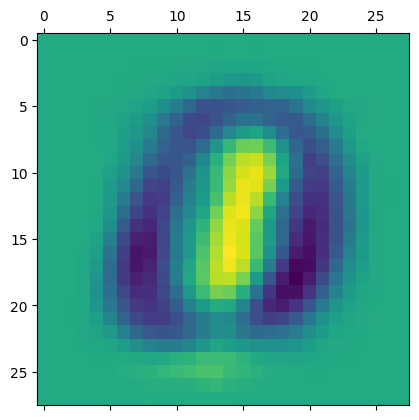

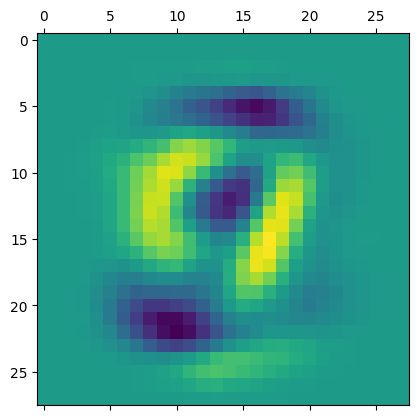

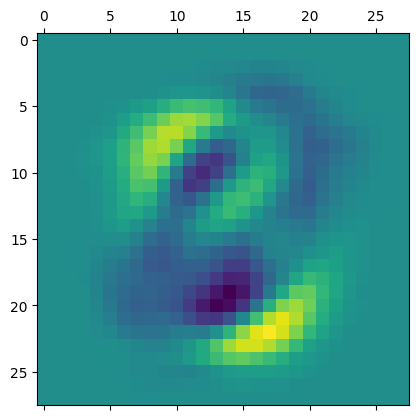

In [10]:
import matplotlib.pyplot as plt

eigenvectors = np.real(eigenvectors.transpose()) # We apply transpose since columns represent the vectors
for i in range(3): # first 3 eigenvectors
    plt.matshow(eigenvectors[i][:-1].reshape(28, 28))

*Show how much of variance is explained by each eigenvector*

In [11]:
eigensum = np.sum(eigenvalues.real) # Total Variance
pca_sum = 0

i = 0
k0 = 0 # k which explains >=85% of the variance
k1 = 0 # k which explains >=95% of the variance
k2 = 0 # k which explains >=99% of the variance
k3 = 0 # k which explains >=99.9% of the variance
k4 = 0 # k which explains >=99.99% of the variance
for val in eigenvalues:
    print("Eigenvector ", i+1, " explains ", "{:.2f}".format((float)((val/eigensum)*100)), "% of the variance.")
    i+=1
    pca_sum += val
    if pca_sum / eigensum < 0.85:
        k0 +=1
    if pca_sum / eigensum < 0.95:
        k1 +=1
    if pca_sum / eigensum < 0.99:
        k2 +=1
    if pca_sum / eigensum < 0.999:
        k3 +=1
    if pca_sum / eigensum < 0.9999:
        k4 +=1
k0+=1
k1+=1
k2+=1
k3+=1
k4+=1

Eigenvector  1  explains  9.70 % of the variance.
Eigenvector  2  explains  6.95 % of the variance.
Eigenvector  3  explains  6.09 % of the variance.
Eigenvector  4  explains  6.08 % of the variance.
Eigenvector  5  explains  4.91 % of the variance.
Eigenvector  6  explains  4.11 % of the variance.
Eigenvector  7  explains  3.38 % of the variance.
Eigenvector  8  explains  2.95 % of the variance.
Eigenvector  9  explains  2.72 % of the variance.
Eigenvector  10  explains  2.26 % of the variance.
Eigenvector  11  explains  2.14 % of the variance.
Eigenvector  12  explains  2.05 % of the variance.
Eigenvector  13  explains  1.79 % of the variance.
Eigenvector  14  explains  1.69 % of the variance.
Eigenvector  15  explains  1.63 % of the variance.
Eigenvector  16  explains  1.42 % of the variance.
Eigenvector  17  explains  1.32 % of the variance.
Eigenvector  18  explains  1.32 % of the variance.
Eigenvector  19  explains  1.24 % of the variance.
Eigenvector  20  explains  1.18 % of the

C:\Users\Arjun\AppData\Local\Temp\ipykernel_8356\1939032636.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  print("Eigenvector ", i+1, " explains ", "{:.2f}".format((float)((val/eigensum)*100)), "% of the variance.")


### (ii) Dimensionality reduction
We analyzed the principal components and determined k which explains 95% and 99% of variance
- **k** *which explains 85%, 95%, 99%, 99.9%, 99.99% of variance*

In [12]:
print("k for 85: ", k0)
print("k for 95: ", k1)
print("k for 99: ", k2)
print("k for 99.9: ", k3)
print("k for 99.99: ", k4)

k for 85:  55
k for 95:  132
k for 99:  278
k for 99.9:  426
k for 99.99:  506


*Since 85% of variance is explained by k0 components, we can reduce our data to a dimension of k0*

In [13]:
Xnew85 = [[np.dot(x,eigenvectors[i]) for i in range(k0)]for x in X.T ]
Xnew85 = np.array(Xnew85)

*Since 95% of variance is explained by k1 components alone, we can reduce our data to a dimension of k1*

In [14]:
Xnew95 = [[np.dot(x,eigenvectors[i]) for i in range(k1)]for x in X.T ]
Xnew95 = np.array(Xnew95)

*Since 99% of variance is explained by k2 components, we will reduce the dimension of x to k2*

In [15]:
Xnew99 = [[np.dot(x,eigenvectors[i]) for i in range(k2)]for x in X.T ]
Xnew99 = np.array(Xnew99)

*Since 99.9% of variance is explained by k2 components, we will reduce the dimension of x to k2*

In [16]:
Xnew999 = [[np.dot(x,eigenvectors[i]) for i in range(k3)]for x in X.T ]
Xnew999 = np.array(Xnew999)

*Since 99.99% of variance is explained by k2 components, we will reduce the dimension of x to k2*

In [17]:
Xnew9999 = [[np.dot(x,eigenvectors[i]) for i in range(k4)]for x in X.T ]
Xnew9999 = np.array(Xnew9999)

*Now we reconstruct it back to a dimension of **784+1 (28x28 +1)***

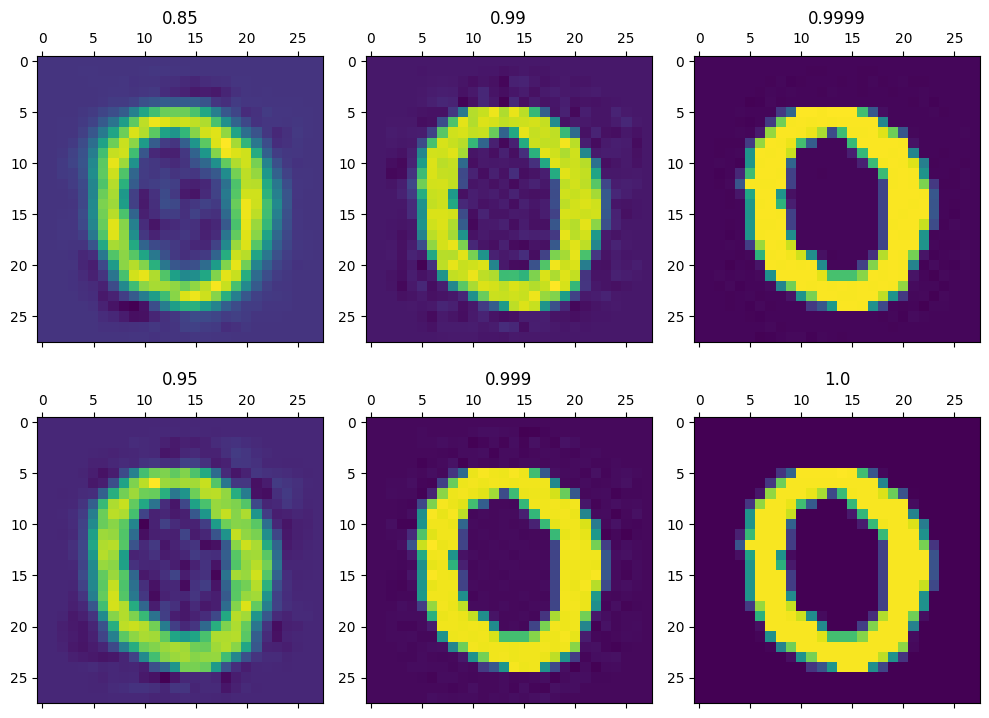

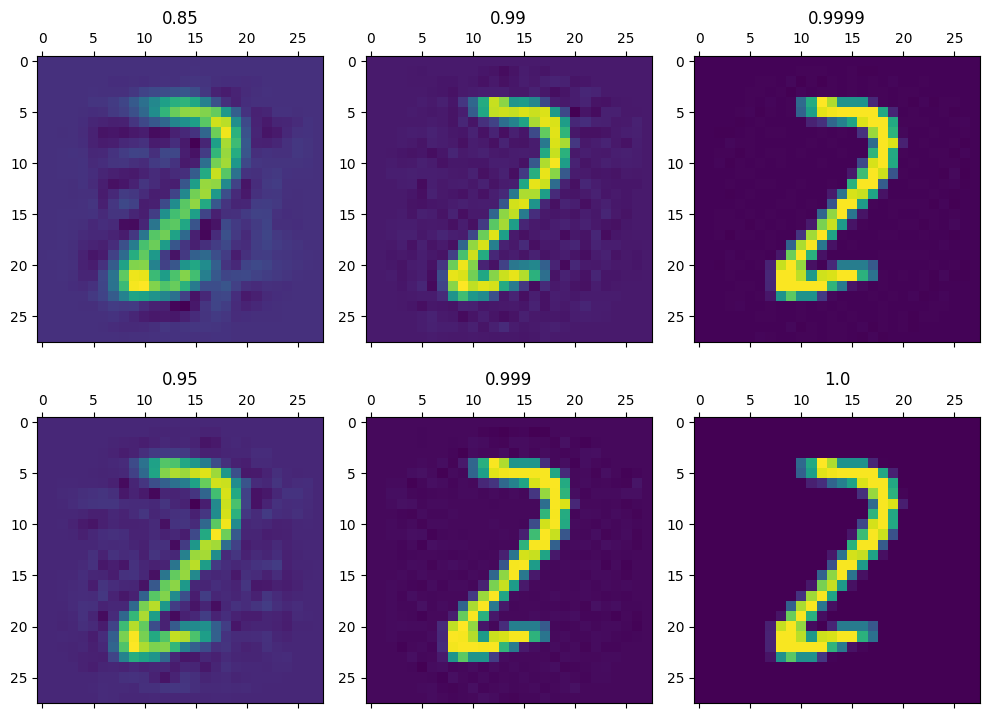

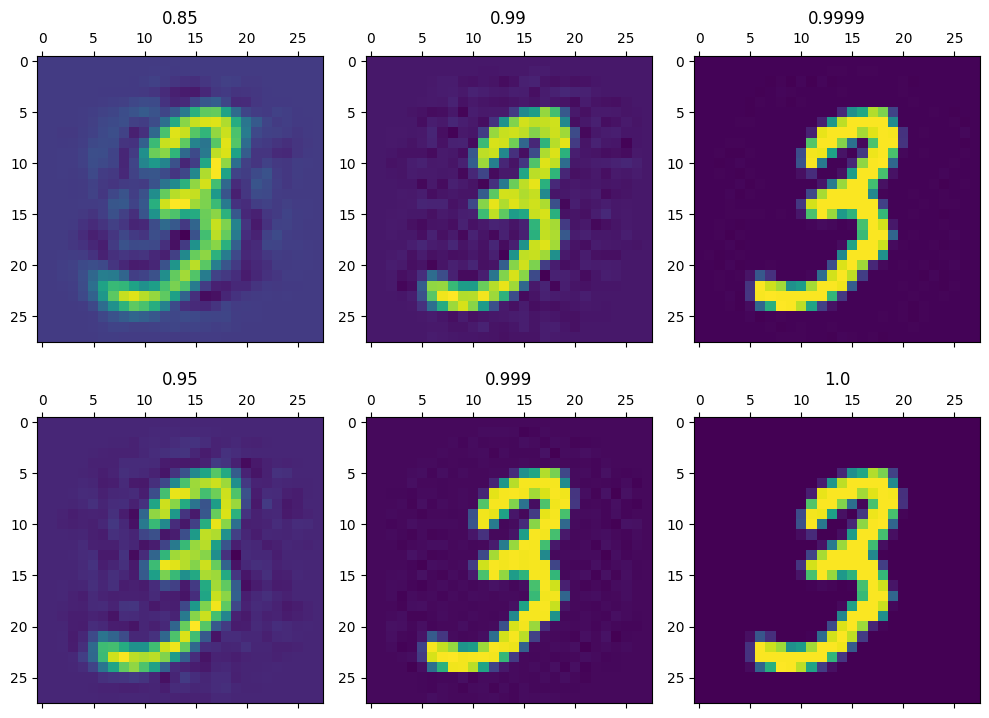

In [18]:
import matplotlib.pyplot as plt
import numpy as np

for number in [0, 200, 300]:
    # Reconstructing and plotting the images
    fig, axs = plt.subplots(2, 3, figsize=(10, 7.5))

    # For 0.85
    xreconstruct = sum(np.multiply(Xnew85[number][i], eigenvectors[i]) for i in range(k0))
    xreconstruct = xreconstruct + mean
    axs[0, 0].matshow(xreconstruct[:-1].reshape(28, 28))
    axs[0, 0].set_title("0.85")

    # For 0.95
    xreconstruct = sum(np.multiply(Xnew95[number][i],eigenvectors[i]) for i in range(k1))
    xreconstruct = xreconstruct + mean
    axs[1, 0].matshow(xreconstruct[:-1].reshape(28,28))
    axs[1, 0].set_title("0.95")

    # For 0.99
    xreconstruct = sum(np.multiply(Xnew99[number][i],eigenvectors[i]) for i in range(k2))
    xreconstruct = xreconstruct + mean
    axs[0, 1].matshow(xreconstruct[:-1].reshape(28,28))
    axs[0, 1].set_title("0.99")

    # For 0.999
    xreconstruct = sum(np.multiply(Xnew999[number][i],eigenvectors[i]) for i in range(k3))
    xreconstruct = xreconstruct + mean
    axs[1, 1].matshow(xreconstruct[:-1].reshape(28,28))
    axs[1, 1].set_title("0.999")

    # For 0.9999
    xreconstruct = sum(np.multiply(Xnew9999[number][i],eigenvectors[i]) for i in range(k4))
    xreconstruct = xreconstruct + mean
    axs[0, 2].matshow(xreconstruct[:-1].reshape(28,28))
    axs[0, 2].set_title("0.9999")

    # # Original Image
    axs[1, 2].matshow((X.T[number]+mean)[:-1].reshape(28,28))
    axs[1, 2].set_title("1.0")

    plt.tight_layout()
    plt.show()

#### Dimension **d** for Downstream tasks:
- We can see that the above dimensions equal to k1 and k2 is adequate to reconstruct the data reasonably well.
- **k1 of around 130** would be preferred over **k2 of around 280** since the benefits of reducing the dimension by half will outweigh the slight increase in accuracy of choosing **k > k2**

### (iii) Kernel PCA
We perform the following steps for each of the kernel functions
- Evaluate ***K*** matrix as a centered data.
- perform PCA on ***K***.

*Auxilliary function to compute PCA*

In [19]:
X = np.array(image_data)

def PCA(K):
    eigenvalues, eigenvectors = eig(K)
    sort_order = np.argsort(eigenvalues)[::-1] # [::-1] for descending order
    eigenvalues = eigenvalues[sort_order] # [n*lambdas] 
    eigenvectors = eigenvectors[:, sort_order] # [Betas]

    alpha = eigenvectors/np.sqrt(np.abs(eigenvalues.real)) # [Betas/sqrt(lambdas)]
    return alpha

#### (A) $κ(x,y) = (1 + x^T y)^d$  for  $d = {2,3,4}$

- We compute the Kernel Matrix using the function below

In [20]:
def Kernel_A(X,i,j,d):
    x = X[i]
    y = X[j]
    return (np.dot(x,y)+1)**d

def create_K_A(X,d):
    n = X.shape[0]
    K_i_l = [sum(Kernel_A(X,i,l,d)/n for l in range(n)) for i in range(n)]
    K_l_l = (sum(K_i_l[i]/n for i in range(n)))

    K = [[(Kernel_A(X,i,j,d)-K_i_l[i]-K_i_l[j]+K_l_l) for j in range(n)] for i in range(n)]
    return K

*Testing for d = 2,3,4*

In [21]:
# d = 2
K_2 = create_K_A(X,2)
K_2 = np.array(K_2)
alphas_2 = PCA(K_2)

# d = 3
K_3 = create_K_A(X,3)
K_3 = np.array(K_3)
alphas_3 = PCA(K_3)

# d = 4
K_4 = create_K_A(X,4)
K_4 = np.array(K_4)
alphas_4 = PCA(K_4)

*Plotting the data point onto top 2 components, **Alpha 1** and **Alpha 2***

Text(0, 0.5, '$\\phi(x)^T$$w_2$')

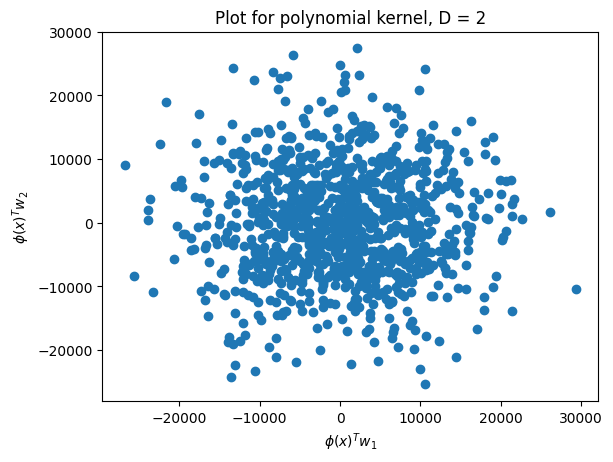

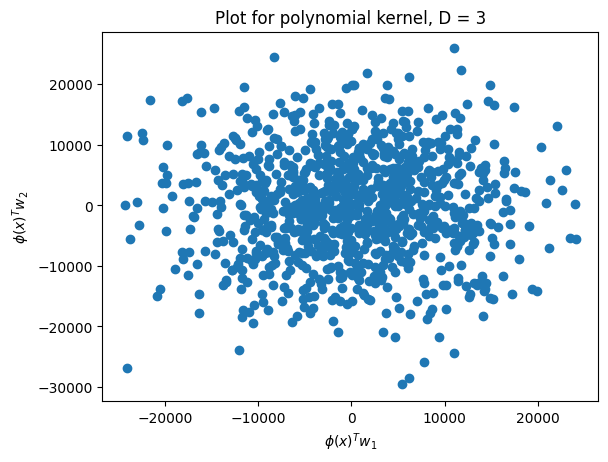

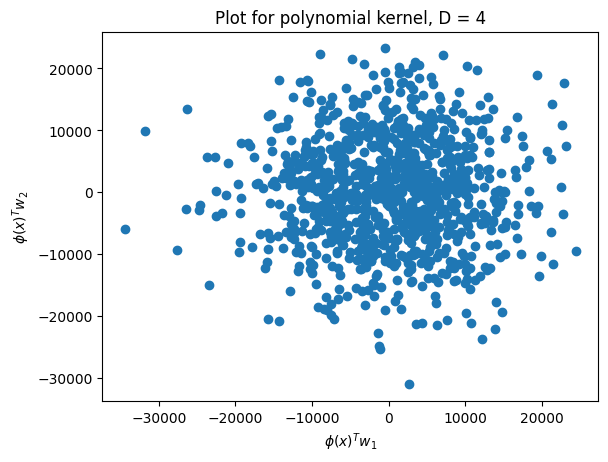

In [22]:
## D = 2
a1_d2= alphas_2.T[0]
a2_d2= alphas_2.T[1]
phi_x_w1_d2 = [np.dot(a1_d2,K_2[i]) for i in range(K_2.shape[0])]
phi_x_w2_d2 = [np.dot(a2_d2,K_2[i]) for i in range(K_2.shape[0])]
plt.figure()
plt.scatter(phi_x_w1_d2,phi_x_w2_d2)
plt.title('Plot for polynomial kernel, D = 2')
plt.xlabel('$\phi(x)^T$$w_1$')
plt.ylabel('$\phi(x)^T$$w_2$')

## D = 3
a1_d3= alphas_3.T[0]
a2_d3= alphas_3.T[1]
phi_x_w1_d3 = [np.dot(a1_d3,K_3[i]) for i in range(K_3.shape[0])]
phi_x_w2_d3 = [np.dot(a2_d3,K_3[i]) for i in range(K_3.shape[0])]
plt.figure()
plt.scatter(phi_x_w1_d3,phi_x_w2_d3)
plt.title('Plot for polynomial kernel, D = 3')
plt.xlabel('$\phi(x)^T$$w_1$')
plt.ylabel('$\phi(x)^T$$w_2$')

## D = 4
a1_d4= alphas_4.T[0]
a2_d4= alphas_4.T[1]
phi_x_w1_d4 = [np.dot(a1_d4,K_4[i]) for i in range(K_4.shape[0])]
phi_x_w2_d4 = [np.dot(a2_d4,K_4[i]) for i in range(K_4.shape[0])]
plt.figure()
plt.scatter(phi_x_w1_d4,phi_x_w2_d4)
plt.title('Plot for polynomial kernel, D = 4')
plt.xlabel('$\phi(x)^T$$w_1$')
plt.ylabel('$\phi(x)^T$$w_2$')


#### (B)$κ(x,y) = exp \dfrac{−(x−y)^T(x−y)}{2\sigma^2}$

- We calculate the Kernel matrix using the function below

In [23]:
def Kernel_B(X,i,j,sig):
    x = X[i]
    y = X[j]
    exponent = (-1)*((np.dot((x-y) ,(x-y).T))/(2*sig*sig))
    return np.exp(exponent)

def create_K_B(X,sig):
    n = X.shape[0]
    K_i_l = [sum(Kernel_B(X,i,l,sig)/n for l in range(n)) for i in range(n)]
    K_l_l = (sum(K_i_l[i]/n for i in range(n)))

    K = [[(Kernel_B(X,i,j,sig)-K_i_l[i]-K_i_l[j]+K_l_l) for j in range(n)] for i in range(n)]
    return K

*Testing for various $\sigma$*

*Plotting the projections of data on $\alpha_1$ and $\alpha_2$*

c:\Users\Arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


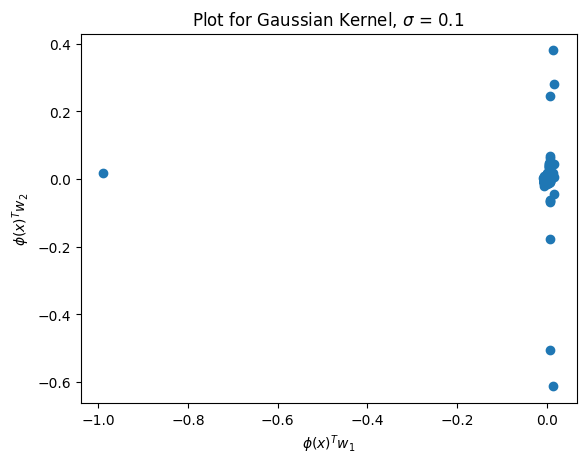

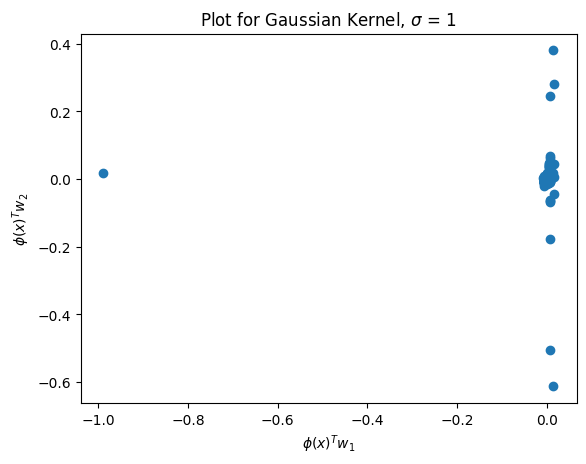

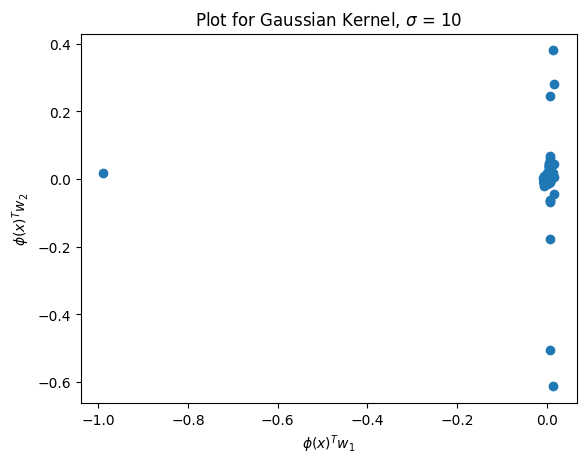

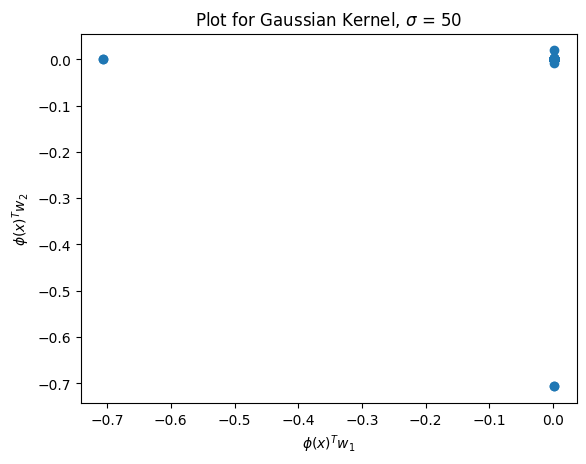

In [24]:
sigmas = [0.1,1,10,50]
for sigma in sigmas:
    K_B = create_K_B(X,sigma)
    K_B = np.array(K_B)
    alphas_B = PCA(K_B)

    a1_B= alphas_B.T[0]
    a2_B= alphas_B.T[1]
    phi_x_w1_B = [np.dot(a1_B,K_B[i]) for i in range(K_B.shape[0])]
    phi_x_w2_B = [np.dot(a2_B,K_B[i]) for i in range(K_B.shape[0])]
    plt.figure()
    plt.scatter(phi_x_w1_B,phi_x_w2_B)
    plt.title('Plot for Gaussian Kernel, $\sigma$ = '+str(sigma))
    plt.xlabel('$\phi(x)^T$$w_1$')
    plt.ylabel('$\phi(x)^T$$w_2$')

#### (iv) The Best kernel
- By plotting the projections along two components, we can see that the polynomial kernel resulted in **no decorrelation** of features, where the plot is scattered around the origin.
- However in the case of Gaussian kernel, for $\sigma=0.1,1,10$, the two components are **decorrelated** and focused along the y axis. $\sigma=50$ gives a more scattered plot since the variance of the distribution is high.
- ***Gaussian Kernel*** is a better fit for the data, because of the above reasons. The kernel smooths out the edges of the *numbers*.

## Question 2:
#### Importing data

In [25]:
df = pd.read_csv('cm_dataset_2 - cm_dataset.csv')
# however, first row in df is being misinterpreted as column titles
dataset = np.zeros((df.shape[0]+1,df.shape[1]))
for i in range(df.shape[1]):
    dataset[1:,i] = df[df.columns[i]]
dataset[0] = np.array(df.columns)
print(dataset)


[[ -1.2061   -2.5268 ]
 [ -3.7038    0.33831]
 [  4.3444    0.96302]
 ...
 [ -2.8458  -14.469  ]
 [-11.173    -7.4088 ]
 [ -2.3857  -13.212  ]]


### Randomized K-means Algorithm
We implement the Llyod's algorithm in the following steps:
- Initialize the means of each cluster *(at random)*.
- Compute the error function for that iteration and if there exists a data point which has a lower MSE with a different cluster mean, we transfer that point to the other cluster.
- Recompute means and MSE and repeat until convergence.

*We use the below auxilliary function for calculating means, given cluster indicators*

In [26]:
def Recalculate_means(Z, dataset, means):
    for i in range(means.shape[0]):
        cluster = dataset[Z==i]
        if cluster.shape[0] != 0:
            means[i] = np.mean(cluster, axis=0)
    return means       

*INITIALIZE*

In [27]:
import random

def Initialize_k_means (dataset, k):
    n = dataset.shape[0]
    Z = np.array([random.randint(0,k-1) for i in range(n)]) # Randomly assigning clusters
    means = Recalculate_means(Z, dataset, np.zeros((k,dataset.shape[1])))
    return Z, means

*Compute MSE and reassign clusters*

In [28]:
def MSE(x, mean):
    return np.linalg.norm(x-mean)


def Reassign_clusters(Z, dataset, means):
    flag = 0
    for i in range(dataset.shape[0]):
        mean = means[Z[i]]
        for j in range(means.shape[0]):
            if MSE(dataset[i], means[j]) < MSE(dataset[i], mean):
                Z[i] = j
                mean = means[j]
                flag = 1
    if flag == 0:
        return Z, 0 # No change in clusters
    else:
        return Z, 1 # Change in clusters

*Final K_means algorithm*

In [29]:
def KMeans(dataset, k,random_init = True, Z = None, means = None):
    if(random_init): Z,means = Initialize_k_means(dataset, k)
    flag = 1 # Flag to check if clusters have changed
    errors = []
    while flag:
        errors.append(sum(MSE(dataset[i], means[(int)(Z[i])]) for i in range(dataset.shape[0])))
        Z, flag = Reassign_clusters(Z, dataset, means)
        means = Recalculate_means(Z, dataset, means)
    return Z, means, errors

*Function to plot the clusters and to plot error w.r.t iteration **and to plot voronoi regions of clusters***

In [30]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def plot_kmeans(dataset, k,voron=False,Title="KMeans"):
    Z,means,errors = KMeans(dataset, k)
    plot_function(dataset, k,Z,means,errors,voron,Title=Title)

def plot_function(dataset, k,Z,means,errors,voron=False,plot_error=True,Title="KMeans"):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Create a figure and a set of subplots
    fig.suptitle(Title)
    # Plot MSE vs Iterations
    if(plot_error):
        axs[0].plot(errors)
        axs[0].set_title('MSE vs Iterations for K = '+str(k))
        axs[0].set_xlabel('Iterations')
        axs[0].set_ylabel('MSE')
    else:
        #remove axs[0]
        fig.delaxes(axs[0])

    if voron: # Voronoi regions
        if k>3:
            vor = Voronoi(means)
            voronoi_plot_2d(vor, ax=axs[1], show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
        elif k == 2:
            mid = np.mean(means, axis=0)
            axs[1].scatter(mid[0], mid[1], c='orange')
            m = (means[1][1]-means[0][1])/(means[1][0]-means[0][0])
            m = -1/m
            axs[1].axline((mid[0], mid[1]),slope = m, c='orange')
        else:
            mid1 = (means[0]+means[1])/2
            mid2 = (means[1]+means[2])/2
            mid3 = (means[0]+means[2])/2
            axs[1].scatter(mid1[0], mid1[1], c='orange')
            axs[1].scatter(mid2[0], mid2[1], c='orange')
            axs[1].scatter(mid3[0], mid3[1], c='orange')
            m1 = (mid1[1]-means[1][1])/(mid1[0]-means[1][0])
            m1 = -1/m1
            c1 = mid1[1] - m1*mid1[0]
            m2 = (mid2[1]-means[2][1])/(mid2[0]-means[2][0])
            m2 = -1/m2
            c2 = mid2[1] - m2*mid2[0]
            m3 = (mid3[1]-means[0][1])/(mid3[0]-means[0][0])
            m3 = -1/m3
            c3 = mid3[1] - m3*mid3[0]

            axs[1].axline((mid1[0], mid1[1]),slope = m1, c='orange')
            axs[1].axline((mid2[0], mid2[1]),slope = m2, c='orange')
            axs[1].axline((mid3[0], mid3[1]),slope = m3, c='orange')

    # Plot Clusters
    axs[1].scatter(dataset[:,0], dataset[:,1], c=Z)
    axs[1].scatter(means[:,0], means[:,1], c='red')
    # Add keys which indicate each cluster and the mean
    for i, mean in enumerate(means):
        axs[1].annotate(f'Cluster {i+1}', (mean[0], mean[1]), textcoords="offset points", xytext=(0,10), ha='center')
        axs[1].annotate(f'Mean {i+1}', (mean[0], mean[1]), textcoords="offset points", xytext=(0,-20), ha='center')
    axs[1].set_xlabel('Feature 1')
    axs[1].set_ylabel('Feature 2')
    axs[1].set_title('Clusters for K = '+str(k))
    
    plt.tight_layout()  # Adjust the padding between and around the subplots
    plt.show()

### (i)   5 random iterations of *K-means* Algorithm with $k=2$

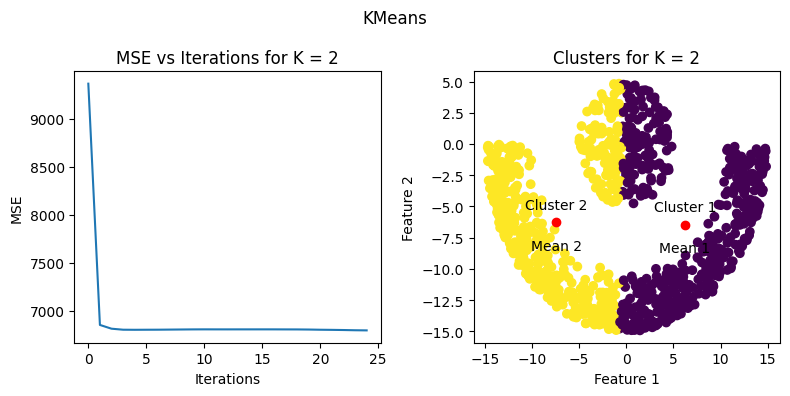

MSE for K = 2:  6792.468532346406


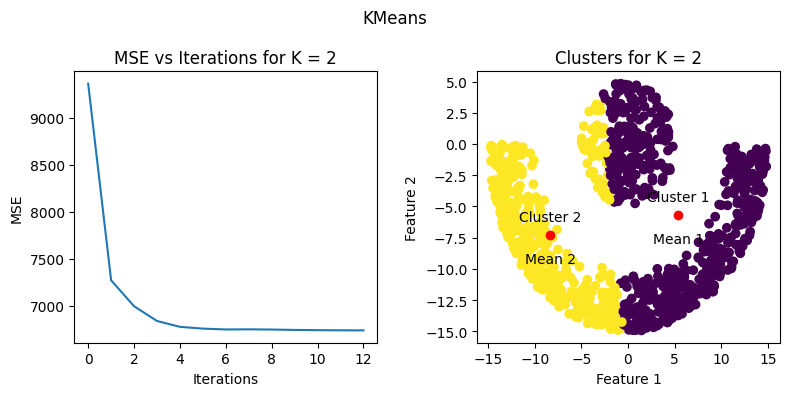

MSE for K = 2:  6737.4000816047455


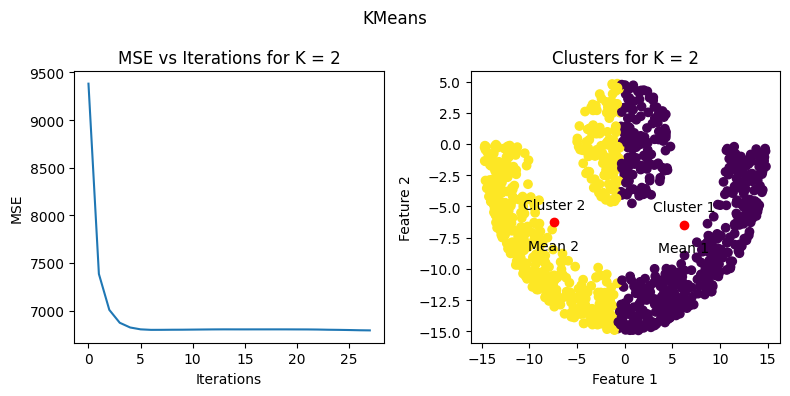

MSE for K = 2:  6792.468532346406


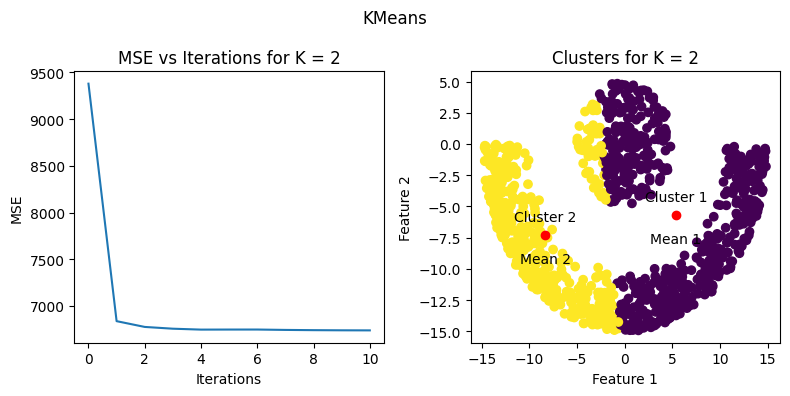

MSE for K = 2:  6737.4000816047455


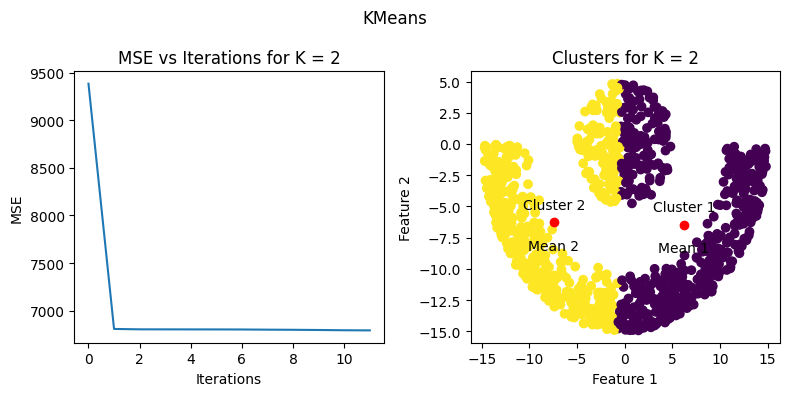

MSE for K = 2:  6792.468532346406


In [31]:
for i in range(5):
    Z,means,errors = KMeans(dataset, 2)
    plot_function(dataset, 2,Z,means,errors)
    mse = sum(MSE(dataset[i], means[(int)(Z[i])]) for i in range(dataset.shape[0]))
    print("MSE for K = 2: ", mse)

### (ii)   *K-means* Algorithm with $k=\{2,3,4,5\}$ and plotting the Voronoi regions of the clusters

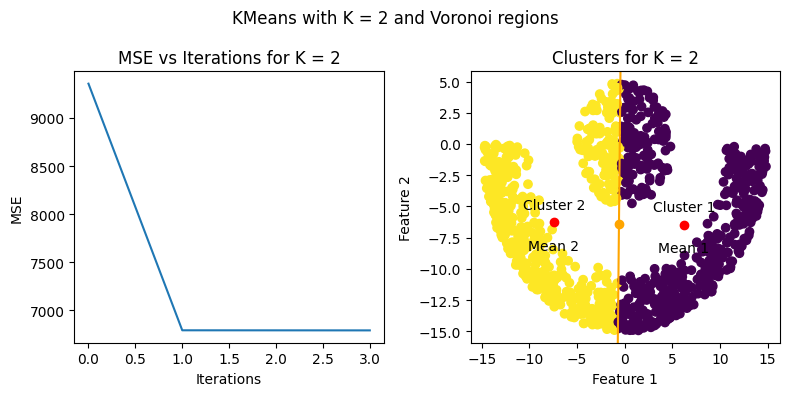

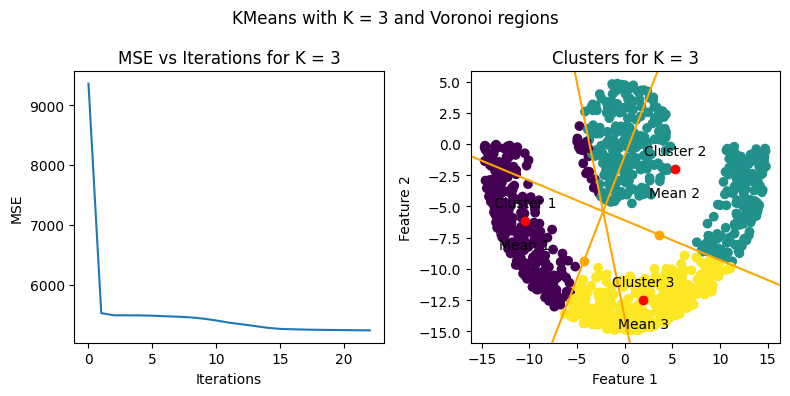

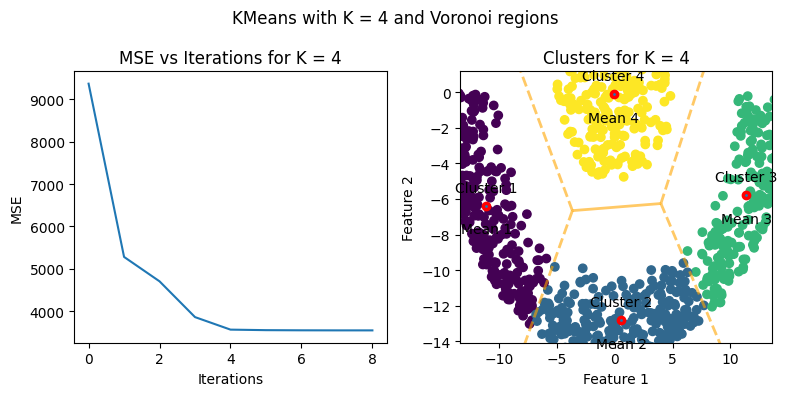

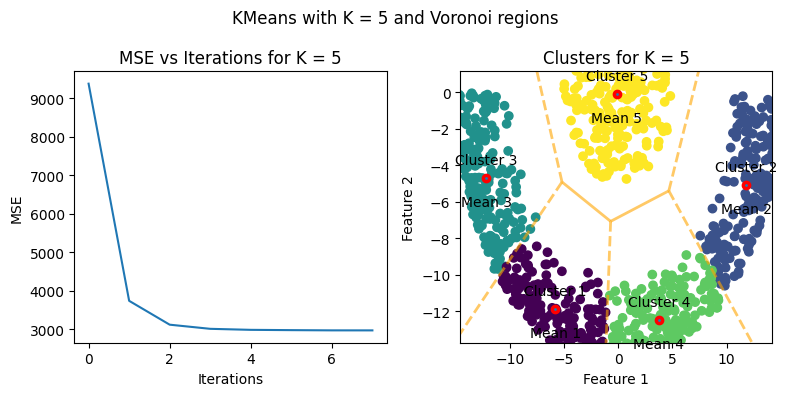

In [32]:
for k in [2,3,4,5]:
    plot_kmeans(dataset, k, voron=True, Title="KMeans with K = "+str(k)+" and Voronoi regions")

### (iii) Spectral Clustering

Let us observe the clustering when choosing a polynomial kernel.
Therefore we will use the kernel:
- $κ(x,y) = (1 + x^T y)^2$

In [33]:
def eigencomputation_spectral(K):
    eigenvalues, eigenvectors = eig(K)
    sort_order = np.argsort(eigenvalues)[::-1] # [::-1] for descending order
    eigenvalues = eigenvalues[sort_order] # [n*lambdas] 
    eigenvectors = eigenvectors[:, sort_order] # [Betas]
    eigenvectors = eigenvectors[:, 0:2]
    return eigenvectors, eigenvalues

*Let us observe the clustering when the top 2 eigenvectors of the centered Kernel are used to plot*

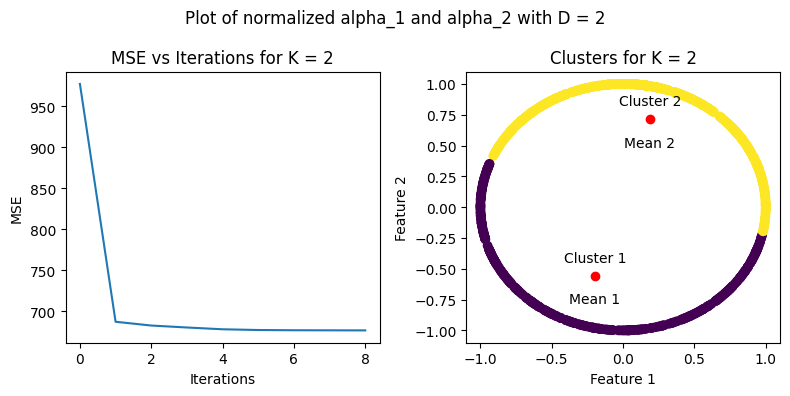

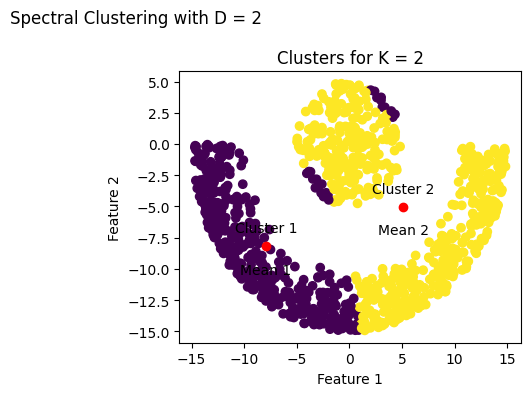

MSE with centered polynomial kernel(d= 2 ):  6864.128299415668


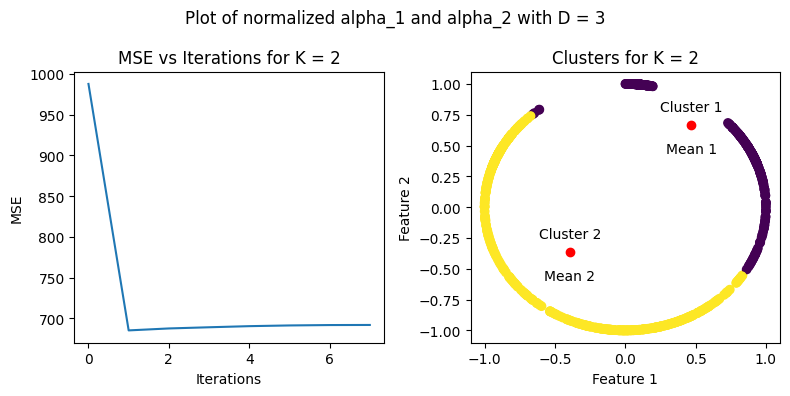

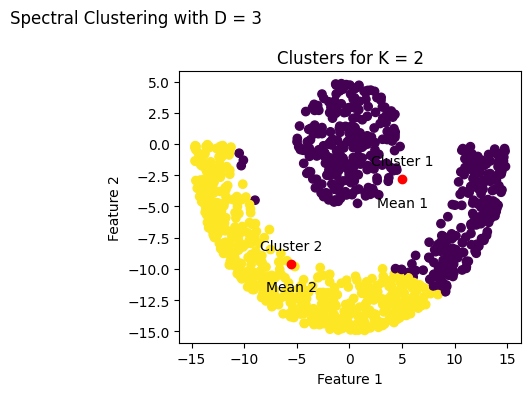

MSE with centered polynomial kernel(d= 3 ):  7146.242231071756


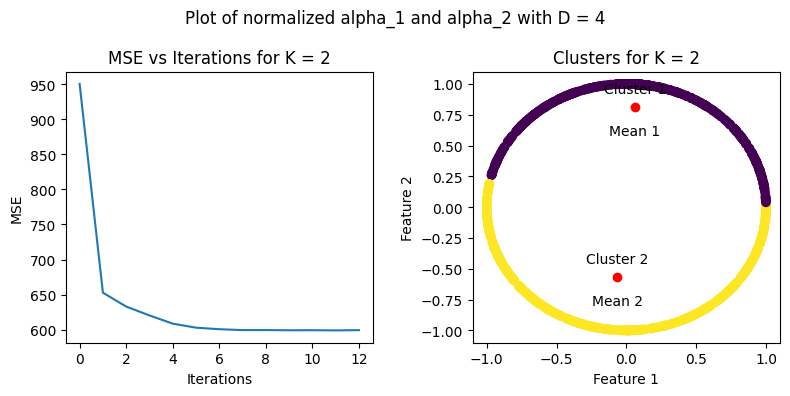

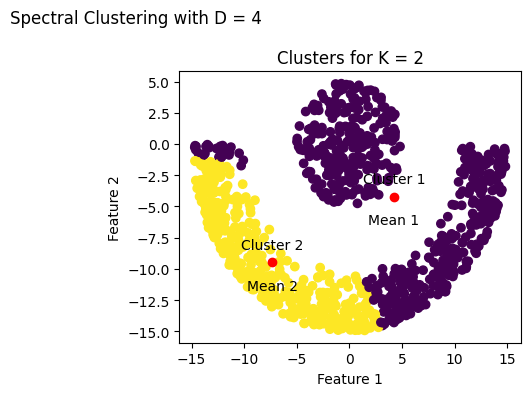

MSE with centered polynomial kernel(d= 4 ):  7023.940134312027


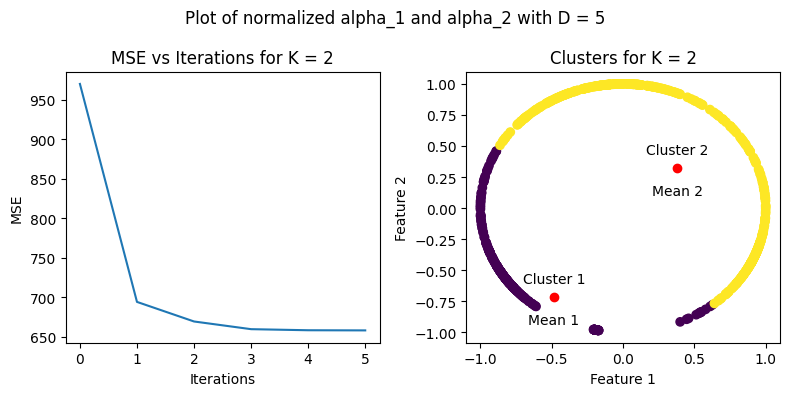

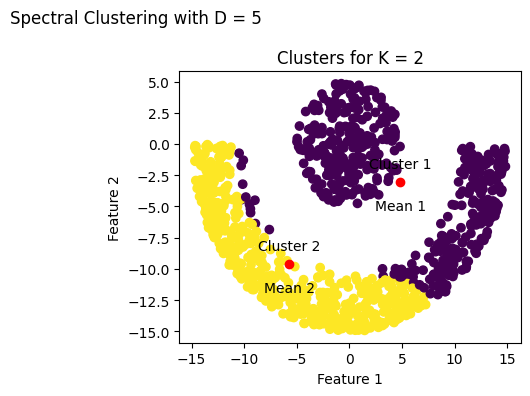

MSE with centered polynomial kernel(d= 5 ):  7165.383481587144


In [34]:
for d in [2,3,4,5]:
    K_spectral = create_K_A(dataset,d) # centered polynomial kernel
    H, eigenvalues = eigencomputation_spectral(K_spectral)

    #Normalizing H
    for i in range(0,1000):
        H[i,:] = H[i,:]/(np.linalg.norm(H[i,:]))

    data = H.real# using H as the dataset
    Z,means,errors = KMeans(data, 2)
    plot_function(data, 2,Z=Z,means=means,errors=errors,Title="Plot of normalized alpha_1 and alpha_2 with D = "+str(d))
    means = Recalculate_means(Z, dataset, means)
    plot_function(dataset, 2,Z=Z,means=means,errors=errors,plot_error=False,Title="Spectral Clustering with D = "+str(d))

    mse = sum(MSE(dataset[i], means[(int)(Z[i])]) for i in range(dataset.shape[0]))
    print("MSE with centered polynomial kernel(d=",d,"): ", mse)

*Lets observe the clustering when radial basis function is used as kernel function*

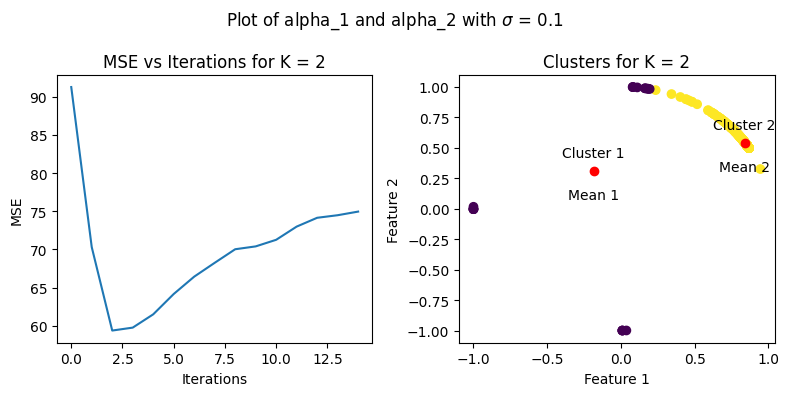

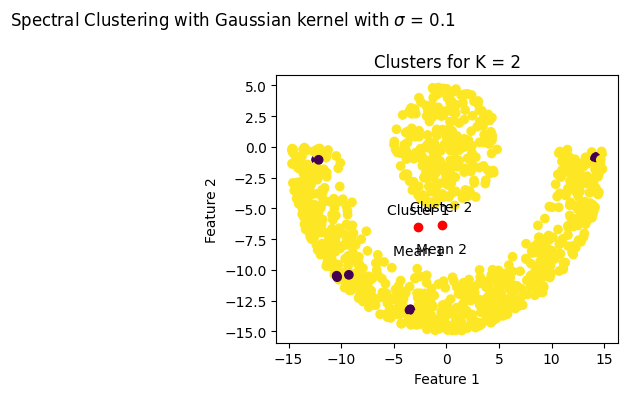

MSE for KMeans on Spectral Data with radial kernel(sigma =  0.1 ):  9372.32542529739


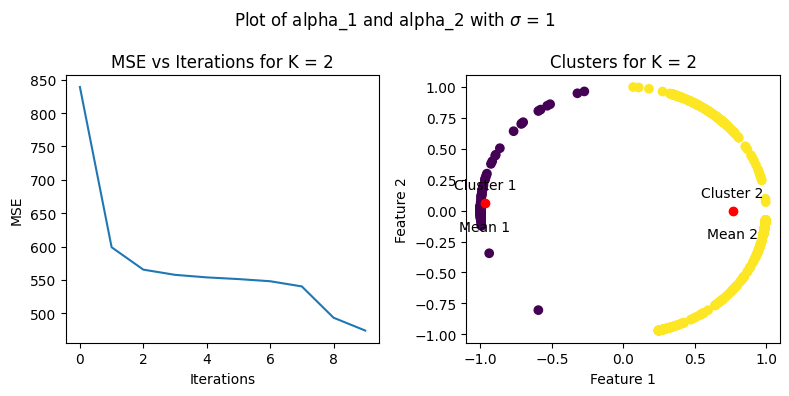

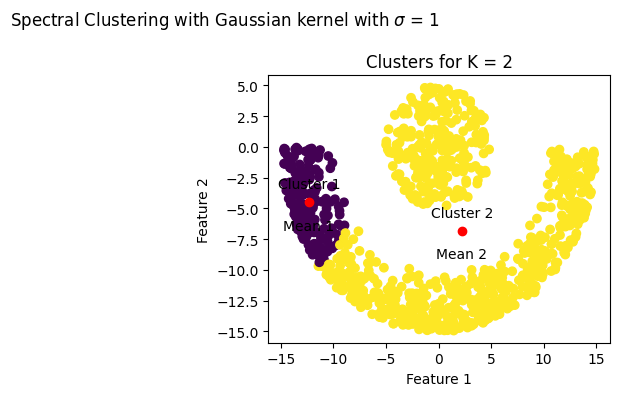

MSE for KMeans on Spectral Data with radial kernel(sigma =  1 ):  7353.631568448041


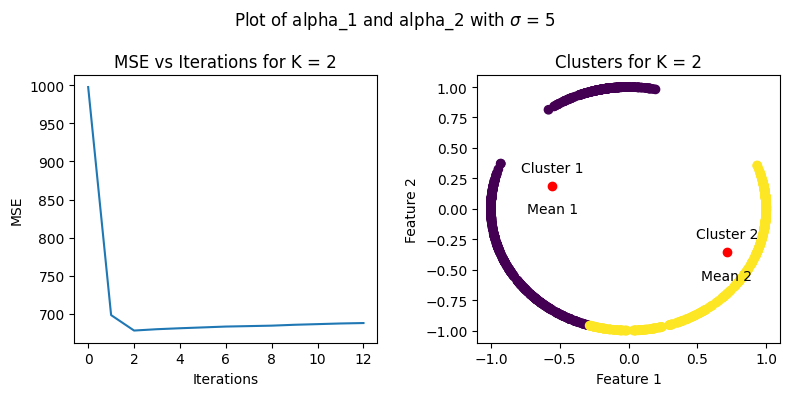

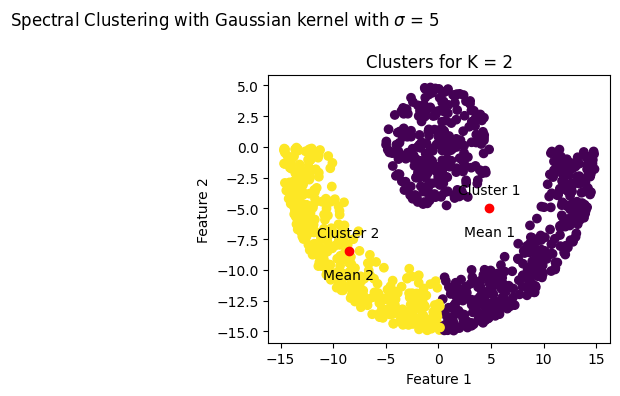

MSE for KMeans on Spectral Data with radial kernel(sigma =  5 ):  6753.219424638272


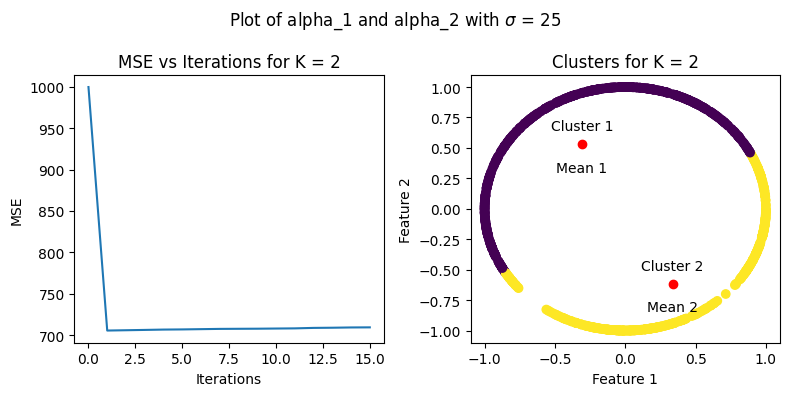

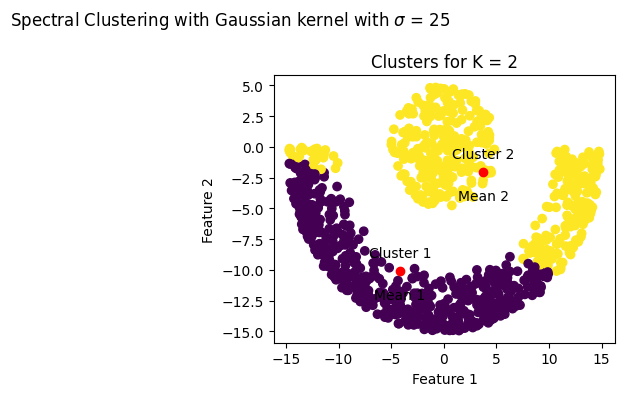

MSE for KMeans on Spectral Data with radial kernel(sigma =  25 ):  7365.359022260083


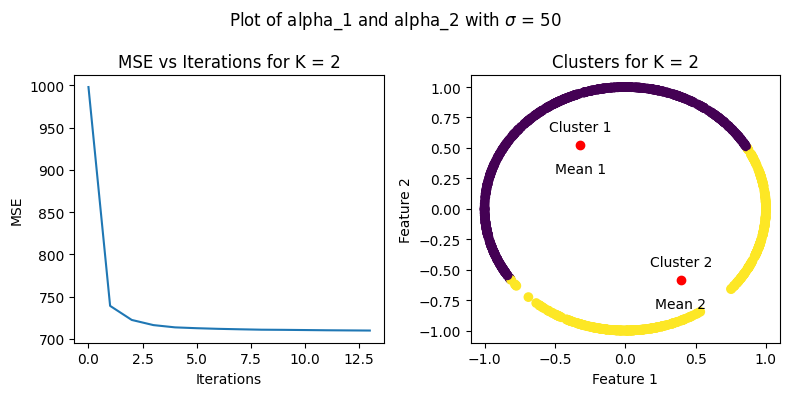

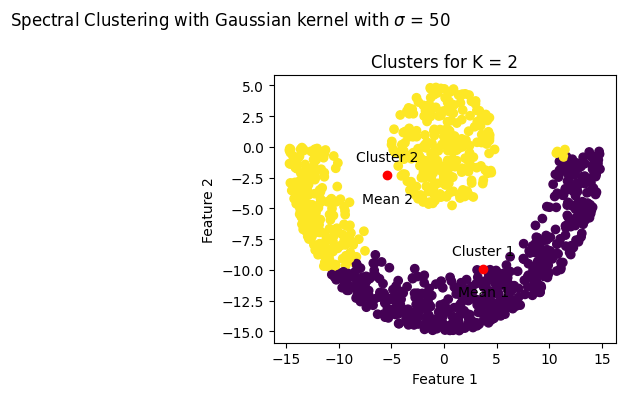

MSE for KMeans on Spectral Data with radial kernel(sigma =  50 ):  7308.84233083276


In [35]:
for sigma in [0.1,1,5,25,50]:
    K_spectral = create_K_B(dataset,sigma)
    H, eigenvalues = eigencomputation_spectral(K_spectral)

    #Normalizing H
    for i in range(0,1000):
        H[i,:] = H[i,:]/(np.linalg.norm(H[i,:]))

    data = H.real# using H as the dataset
    Z,means,errors = KMeans(data, 2)
    plot_function(data, 2,Z=Z,means=means,errors=errors,Title="Plot of alpha_1 and alpha_2 with $\sigma$ = "+str(sigma))
    means = Recalculate_means(Z, dataset, means)
    plot_function(dataset, 2,Z=Z,means=means,errors=errors,plot_error=False,Title="Spectral Clustering with Gaussian kernel with $\sigma$ = "+str(sigma))

    mse = (sum(MSE(dataset[i], means[(int)(Z[i])]) for i in range(dataset.shape[0])))
    print("MSE for KMeans on Spectral Data with radial kernel(sigma = ",sigma,"): ", mse)


#### Choice of Kernel:
- A gaussian distribution with small $\sigma$ gives us a poor clustering of data whereas a higher $\sigma$ gives us good differentiation of the centre accumulation.
- In comparison to the polynomial kernel, the radial basis function of $\sigma>= gives us a better demarcationof the central accumulation,

### (iv) Maximum argument cluster assignment

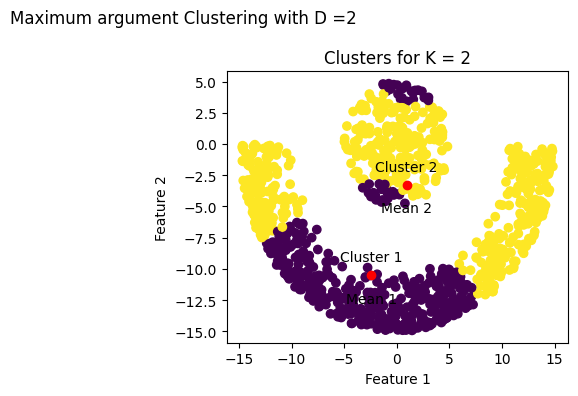

MSE for max arg spectral Clustering with d = 2 :  8037.984935449364


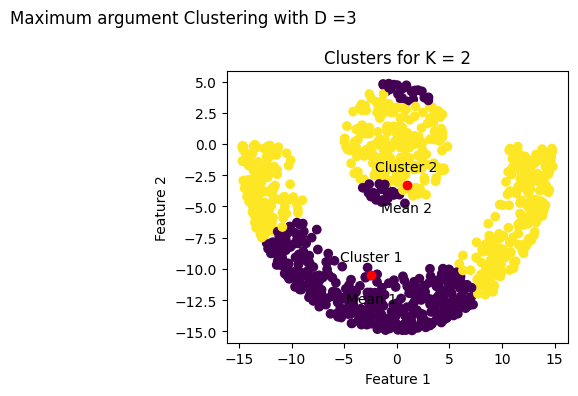

MSE for max arg spectral Clustering with d = 3 :  8037.984935449364


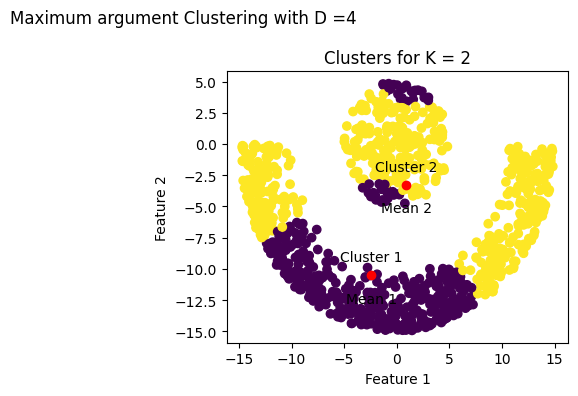

MSE for max arg spectral Clustering with d = 4 :  8037.984935449364


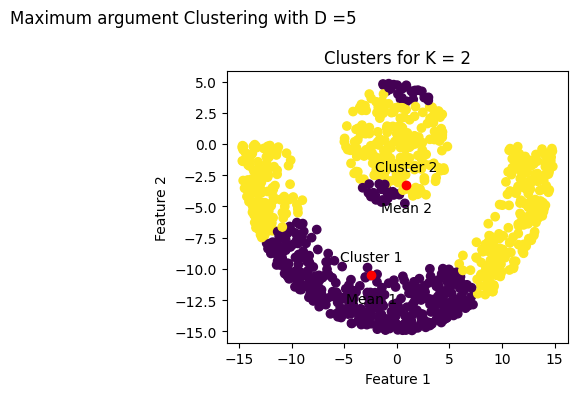

MSE for max arg spectral Clustering with d = 5 :  8037.984935449364


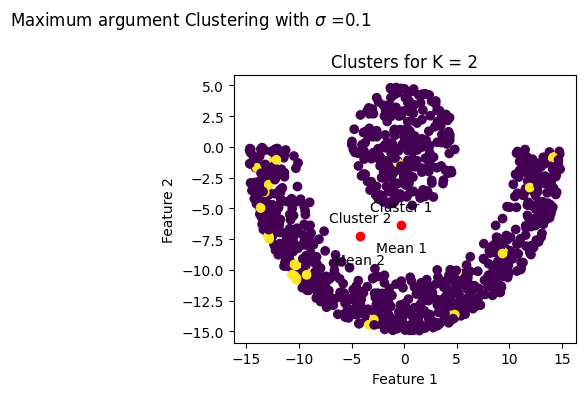

MSE for max arg spectral Clustering with sigma = 0.1 :  9319.27329718839


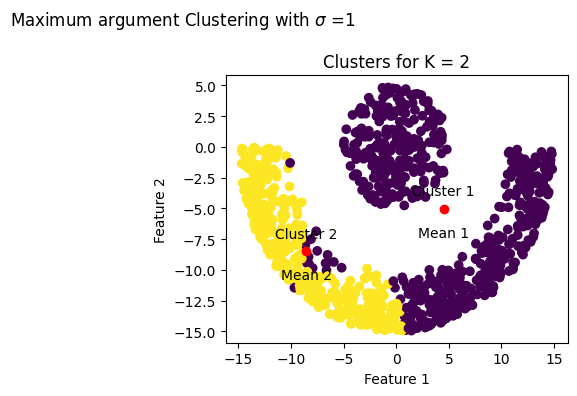

MSE for max arg spectral Clustering with sigma = 1 :  6937.87672991737


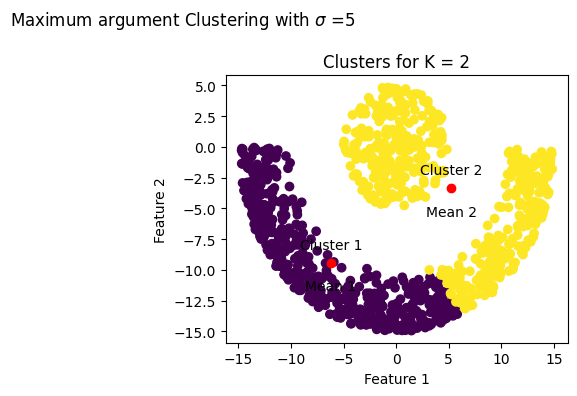

MSE for max arg spectral Clustering with sigma = 5 :  7017.156384910947


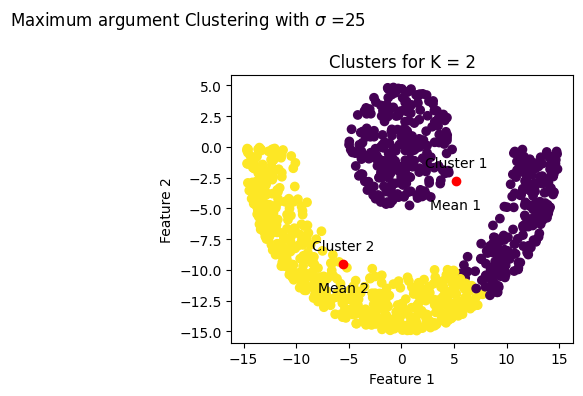

MSE for max arg spectral Clustering with sigma = 25 :  7132.431792341097


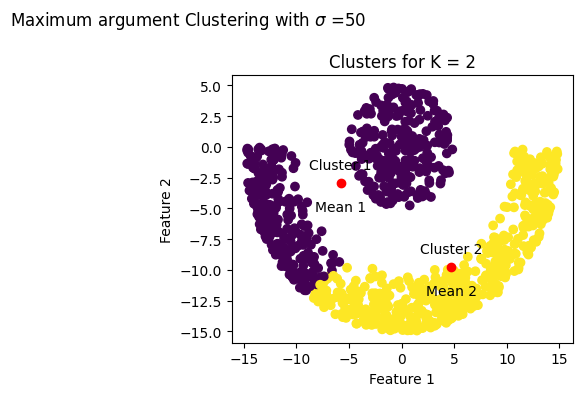

MSE for max arg spectral Clustering with sigma = 50 :  7122.94113725479


In [36]:
for d in [2,3,4,5]:
    K_spectral = create_K_A(dataset,d=2)
    H, eigenvalues = eigencomputation_spectral(K_spectral)
    for i in range(1000):
        Z[i] = np.argmax(H[i])
    Z = Z.astype(int)
    means = np.array(Recalculate_means(Z,dataset,means))
    plot_function(dataset, 2,Z=Z,means=means,errors=errors,plot_error=False,Title="Maximum argument Clustering with D =" + str(d))
    mse = sum(MSE(dataset[i], means[(int)(Z[i])]) for i in range(dataset.shape[0]))
    print("MSE for max arg spectral Clustering with d =",d,": ", mse)

for sigma in [0.1,1,5,25,50]:
    K_spectral = create_K_B(dataset,sigma)
    H, eigenvalues = eigencomputation_spectral(K_spectral)
    for i in range(1000):
        Z[i] = np.argmax(H[i])
    Z = Z.astype(int)
    means = np.array(Recalculate_means(Z,dataset,means))
    plot_function(dataset, 2,Z=Z,means=means,errors=errors,plot_error=False,Title="Maximum argument Clustering with $\sigma$ =" + str(sigma))
    mse = sum(MSE(dataset[i], means[(int)(Z[i])]) for i in range(dataset.shape[0]))
    print("MSE for max arg spectral Clustering with sigma =",sigma,": ", mse)

- We Observe that the above method produces clustering which is similar to prior plots
- The method given is analogous to row normalizing H.
- So, when H is of the form $H= ZL^{\frac{1}{2}}$, the above will produce same result as normalizing rows of $H$